<a href="https://colab.research.google.com/github/Oukofredd/Machine-Learning/blob/main/assignment_on_mumbai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## THE PROBLEM OF THE STATEMENT


Mumbai, is a coastal city in India. It experiences variant rainfall patterns throughout the year. Understanding and predicting the amount of rainfall is key for agricultural planning, disaster management, and urban infrastructure development. Traditional methods of rainfall forecasting may not always provide accurate predictions due to the complexity of weather patterns. Therefore, employing machine learning techniques to classify monthly rainfall can enhance predictive accuracy and facilitate better decision-making.

The primary objective of this study is to classify monthly rainfall data in Mumbai. We are going to classify it into three categories:Low, Medium, and High.For the study we will be using a Gaussian Naive Bayes classifier. This classification aims to provide insights into rainfall patterns, aiding stakeholders in planning and preparedness.

## DATA LOADING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file
import pandas as pd
fr = pd.read_csv('mumbai-monthly-rains.csv')



Saving mumbai-monthly-rains.csv to mumbai-monthly-rains (1).csv


,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531


In [ ]:
fr.head()
# viewing first few rows(4)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,rainfall_category
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,2
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,2
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,2
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,1
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,1


In [ ]:
#Viewing of the last few rows(4)
fr.tail()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,rainfall_category
116,2017,0.000000,0.000000,0.000000,0.000000,1.04389,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642,0
117,2018,0.000000,0.000000,0.000000,0.000000,0.00000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599,2
118,2019,0.000000,0.000000,0.000000,0.000000,0.00000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801,0
119,2020,0.000000,0.000000,0.104274,0.000000,0.00000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531,0
120,2021,0.727235,0.825876,0.010660,0.002233,219.07506,796.307275,981.146645,323.199896,601.247517,36.040432,25.156942,90.044602,3073.784373,0


In [ ]:
#summary of dataframe
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Jan                121 non-null    float64
 2   Feb                121 non-null    float64
 3   Mar                121 non-null    float64
 4   April              121 non-null    float64
 5   May                121 non-null    float64
 6   June               121 non-null    float64
 7   July               121 non-null    float64
 8   Aug                121 non-null    float64
 9   Sept               121 non-null    float64
 10  Oct                121 non-null    float64
 11  Nov                121 non-null    float64
 12  Dec                121 non-null    float64
 13  Total              121 non-null    float64
 14  rainfall_category  121 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 14.3 KB


## DATA PREPROCESSING

In [ ]:
#checking for missing values
fr.isnull()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,rainfall_category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
fr.isnull().sum()

,0
Year,0
Jan,0
Feb,0
Mar,0
April,0
May,0
June,0
July,0
Aug,0
Sept,0


In [ ]:
# checking for duplicates
fr.duplicated().sum()

0

In [ ]:
completeness=fr.notnull().sum()/len(fr)
completeness

,0
Year,1.0
Jan,1.0
Feb,1.0
Mar,1.0
April,1.0
May,1.0
June,1.0
July,1.0
Aug,1.0
Sept,1.0


In [ ]:
fr.shape

(121, 14)

In [ ]:
fr.dtypes

,0
Year,int64
Jan,float64
Feb,float64
Mar,float64
April,float64
May,float64
June,float64
July,float64
Aug,float64
Sept,float64


In [ ]:
year_column=fr['Year']
print(year_column)

0      1901
1      1902
2      1903
3      1904
4      1905
       ... 
116    2017
117    2018
118    2019
119    2020
120    2021
Name: Year, Length: 121, dtype: int64


In [53]:
#we classify rainfal totals to low, medium and hig
def classifying_rainfal_totals(Total):
    if Total< 1900:
        return 'Low'
    elif Total< 2400:
        return 'Medium'
    else:
        return 'High'

In [54]:
fr['rainfall_category']= fr["Total"].apply(classifying_rainfal_totals)


In [55]:
print(fr['rainfall_category'].value_counts())

rainfall_category
Medium    48
High      38
Low       35
Name: count, dtype: int64


In [56]:
frouks= LabelEncoder()
fr['rainfall_category']= frouks.fit_transform(fr['rainfall_category'])


In [57]:

summary_stats = fr.describe()
print(summary_stats)



              Year         Jan         Feb         Mar       April  \
count   121.000000  121.000000  121.000000  121.000000  121.000000   
mean   1961.000000    1.567235    0.929358    0.869231    1.428458   
std      35.073732    6.462247    3.077050    2.890032    7.371307   
min    1901.000000    0.000000    0.000000    0.000000    0.000000   
25%    1931.000000    0.000000    0.000000    0.000000    0.000000   
50%    1961.000000    0.000000    0.000000    0.000000    0.000000   
75%    1991.000000    0.000000    0.152298    0.000000    0.194165   
max    2021.000000   51.348290   21.107118   18.252996   75.541818   

              May         June         July          Aug        Sept  \
count  121.000000   121.000000   121.000000   121.000000  121.000000   
mean    18.183632   517.854402   757.407412   465.600818  312.885747   
std     48.628812   251.067016   285.836188   249.072915  205.135368   
min      0.000000    61.058662   103.209194    87.493370   36.313545   
25%      

In [58]:
fr.describe()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,rainfall_category
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,1.567235,0.929358,0.869231,1.428458,18.183632,517.854402,757.407412,465.600818,312.885747,73.983526,13.849462,3.556428,2168.115709,1.082645
std,35.073732,6.462247,3.077050,2.890032,7.371307,48.628812,251.067016,285.836188,249.072915,205.135368,96.686113,29.689941,12.342390,533.263926,0.842484
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.058662,103.209194,87.493370,36.313545,0.000000,0.000000,0.000000,1058.840525,0.000000
25%,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.094617,540.745923,268.002392,149.584208,9.871696,0.000000,0.000000,1834.996957,0.000000
50%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.355001,482.449872,788.403637,445.870342,269.276549,43.479170,1.066086,0.000000,2126.054987,1.000000
75%,1991.000000,0.000000,0.152298,0.000000,0.194165,4.208322,678.040770,942.616099,604.372615,398.645218,98.235161,9.373154,0.176149,2478.558089,2.000000
max,2021.000000,51.348290,21.107118,18.252996,75.541818,234.392757,1219.518576,1358.833554,1200.956558,987.796660,552.902707,164.348387,90.044602,3563.259531,2.000000


In [59]:
numeric_columns=['Year','Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec','Total']
num_fr=fr[numeric_columns]
num_fr

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531


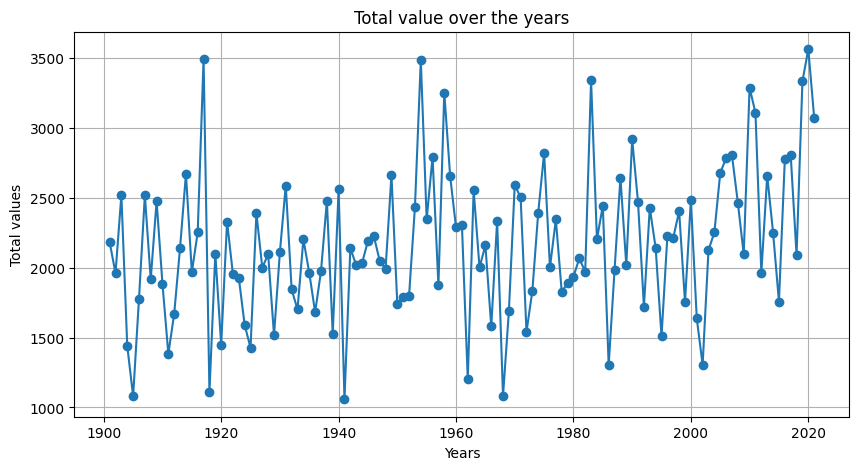

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fr['Year'],fr['Total'], marker='o')
plt.title('Total value over the years')
plt.xlabel('Years')
plt.ylabel('Total values')
plt.grid()
plt.show()

In [61]:
x=fr[['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']]
y=fr['rainfall_category']


In [62]:
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [63]:
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [64]:
fred= GaussianNB()
fred.fit(x_train,y_train)
y_pred= fred.predict(x_test)

In [65]:
classification_models=['GaussianNB']
classification_predictions=['y_pred']
clasification_results={}

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.54      0.70      0.61        10
           2       0.69      0.56      0.62        16

    accuracy                           0.65        37
   macro avg       0.65      0.66      0.65        37
weighted avg       0.66      0.65      0.65        37



## results visualization

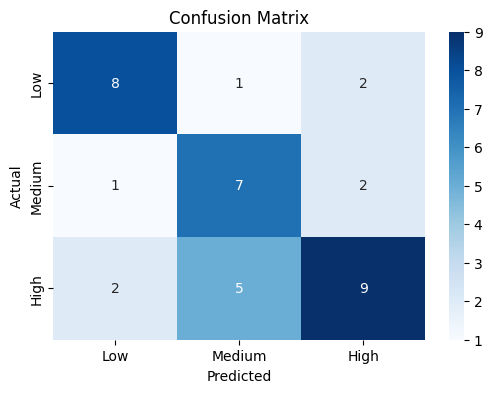

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
conda update scikit-learn
